In [2]:
import tensorflow as tf
print(tf.__version__) 

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2025-03-25 22:08:40.927058: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.19.0
Notebook last run (end-to-end): 2025-03-25 22:08:44.755516


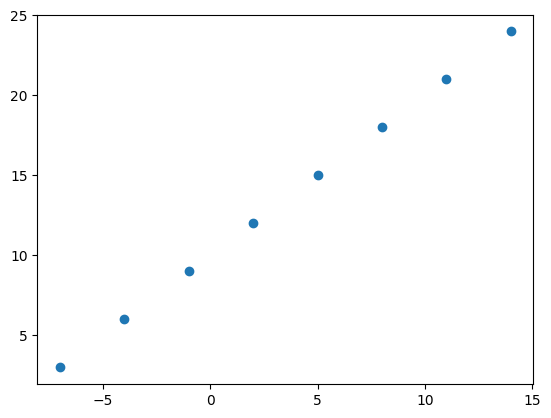

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize data
plt.scatter(X,y)

In [4]:
# X+10
# y == X+10

In [5]:
#Input and output shapes, create demo tensor for housing price prediction
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [7]:
X[0].ndim
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [8]:
##To jakieś dziwne zakomentuje i od razu zrobię tf.constant
#turn numpy to tensor
# X=tf.cast(tf.constant(X),dtype=tf.float32)
# y=tf.cast(tf.constant(y),dtype=tf.float32)
# X,y

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

Modelowanie w tensorflow + ulepszanie


In [10]:
#set random seed
tf.random.set_seed(42)

#Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#Fit model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - loss: 9.3201 - mae: 9.3201
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.0108 - mae: 9.0108
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.6968 - mae: 8.6968
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.3801 - mae: 8.3801
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.0741 - mae: 8.0741
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.7644 - mae: 7.7644
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.4481 - mae: 7.4481
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.1249 - mae: 7.1249
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.7957 - mae: 6.7957
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.4597 - mae: 6.4597
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.1167 - mae: 6.1167
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.7664 - mae: 5.7664
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/st

In [11]:
#Check out X,y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
#Try and make a prediction using model
x_test = np.array([-7.0])
y_pred=model.predict(x_test)
y_pred



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[3.015337]], dtype=float32)

In [13]:
#Rebuilding model

#Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Comnpile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 13.9347 - mae: 13.9347
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.4052 - mae: 13.4052
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.8755 - mae: 12.8755
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.3541 - mae: 12.3541
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.8225 - mae: 11.8225
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.2757 - mae: 11.2757
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.7090 - mae: 10.7090
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.1171 - mae: 10.1171
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.5012 - mae: 9.5012
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.8636 - mae: 8.8636
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.1918 - mae: 8.1918
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.4728 - mae: 7.4728
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [14]:
#Predict
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
#Model prediction
x_test = np.array([17.0])
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[31.992094]], dtype=float32)

In [16]:
#Another model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#Fit model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - loss: 13.5105 - mae: 13.5105
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.8103 - mae: 12.8103
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.1139 - mae: 12.1139
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.4184 - mae: 11.4184
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.7204 - mae: 10.7204
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.0171 - mae: 10.0171
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.3060 - mae: 9.3060
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.5852 - mae: 8.5852
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.8518 - mae: 7.8518
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.1030 - mae: 7.1030
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.7305 - mae: 6.7305
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9694 - mae: 6.9694
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [17]:
x_test = np.array([17.0])
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[27.129435]], dtype=float32)

In [18]:
#Evaluate model performace

#Bigger dataset
X = tf.range(-100,100,4)
y=tf.range(-90,110,4)
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

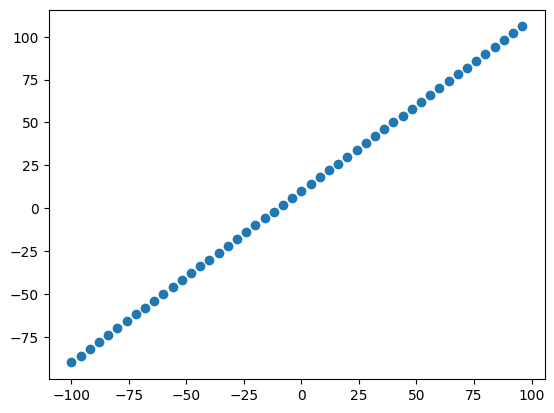

In [19]:
#Visualize data
plt.scatter(X,y)

In [20]:
#Split data into training and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

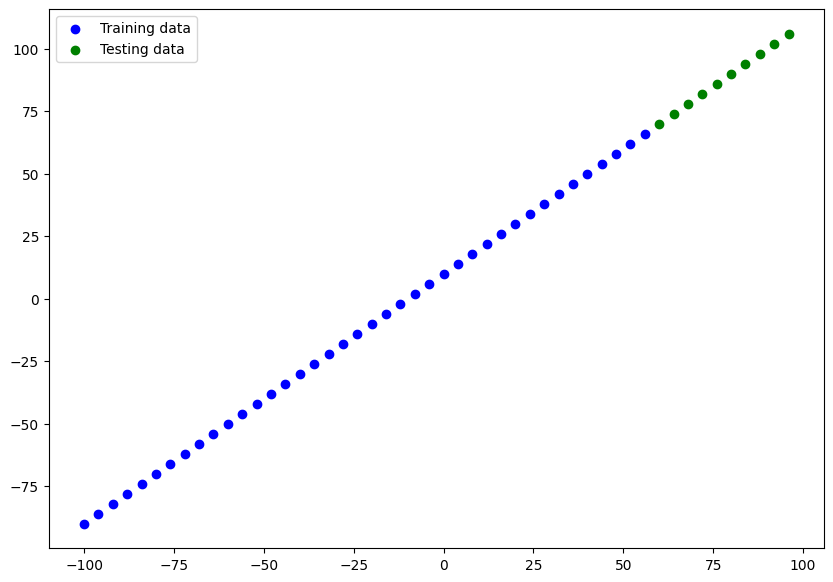

In [21]:
#Visualize data
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [22]:
#Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# #Fit model
# model.fit(X_train, y_train, epochs=100)

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
#SEt random seed
tf.random.set_seed(42)

#Create model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1],name="hidden_layer_1"),
    tf.keras.layers.Dense(100, name="hidden_layer_2"),
    tf.keras.layers.Dense(100, name="hidden_layer_3"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#Summary
model.summary()

/home/hub/miniconda3/envs/tf-cpu/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,501 (80.08 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [26]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,505 (240.26 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,004 (160.18 KB)

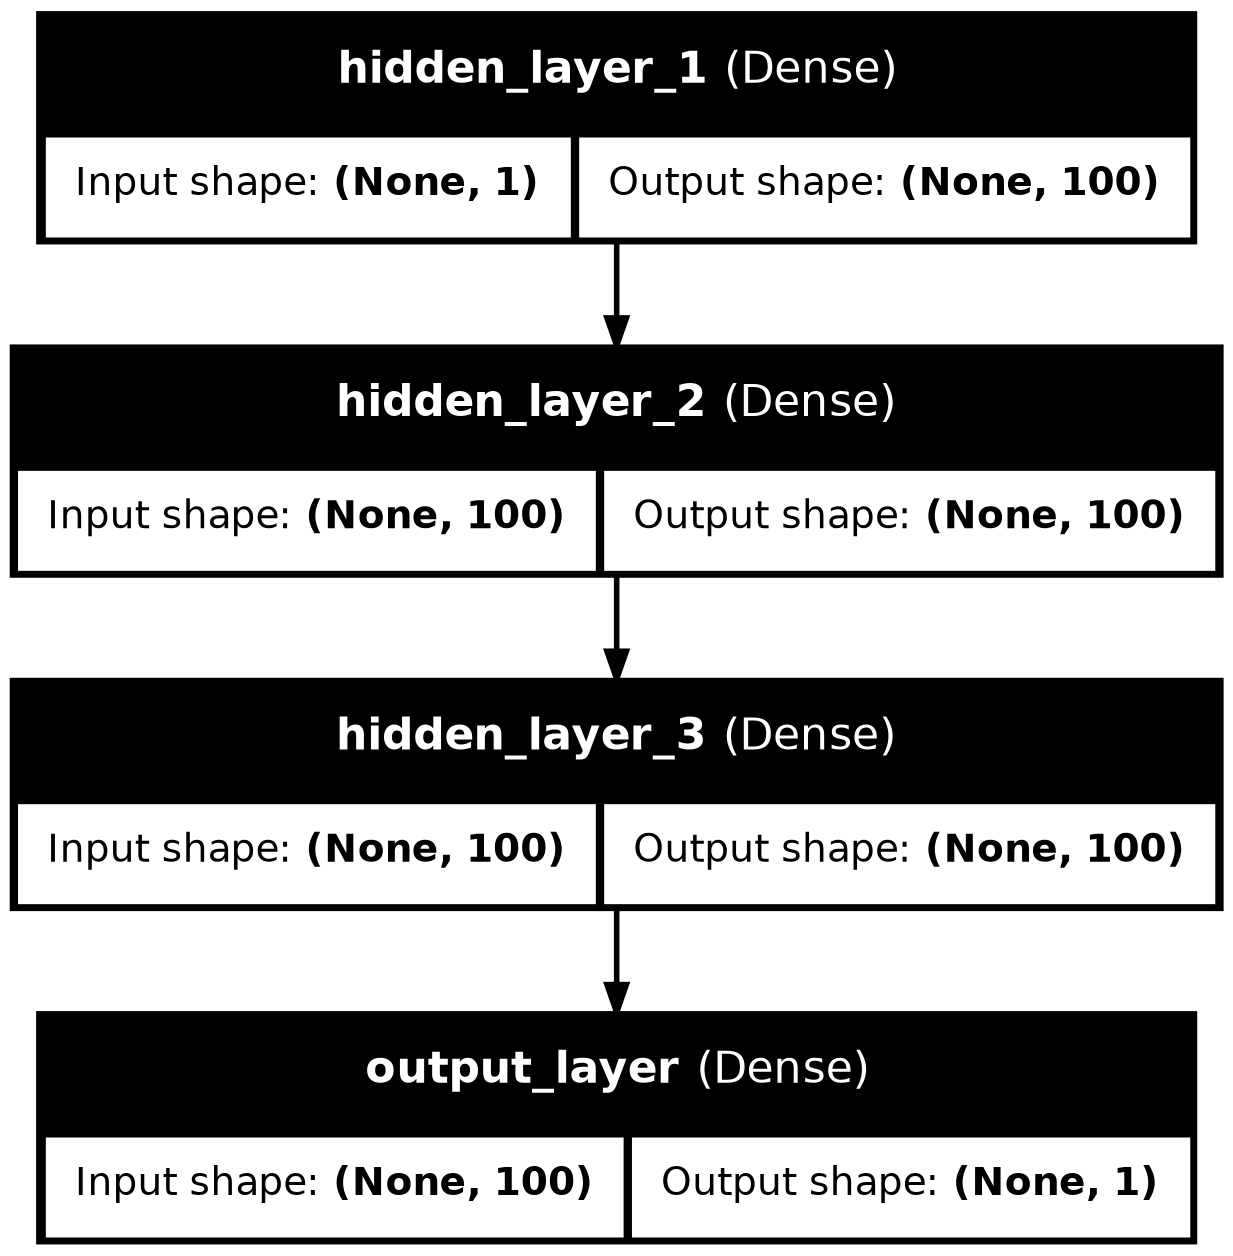

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_layer_names=True, show_shapes=True)


In [28]:
#Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[ 67.49771],
       [ 71.35093],
       [ 75.20416],
       [ 79.05739],
       [ 82.91063],
       [ 86.76385],
       [ 90.61707],
       [ 94.47031],
       [ 98.32351],
       [102.17673]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [30]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    # Show the legend
    plt.legend()

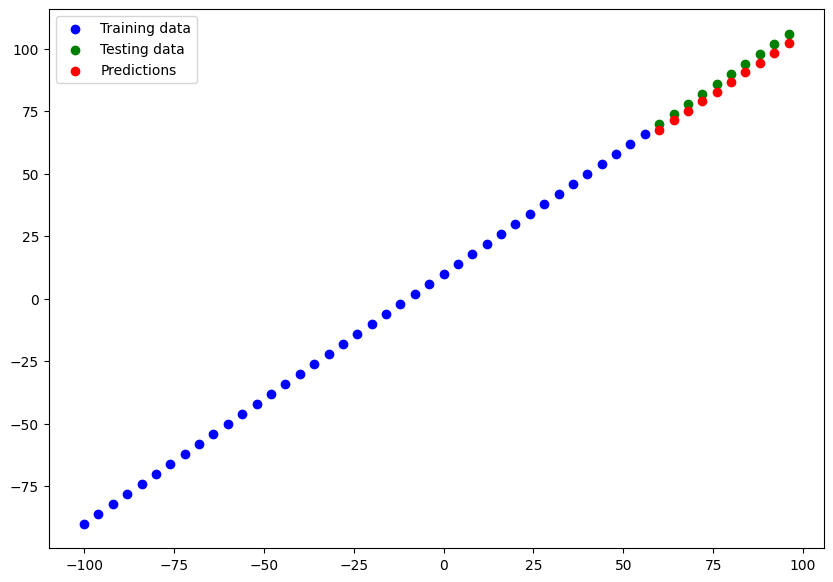

In [31]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [32]:
#Evaluate model
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 3.1628 - mae: 3.1628


[3.162771701812744, 3.162771701812744]

In [33]:
mae = tf.metrics.mae(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.5022888, 2.6490707, 2.7958374, 2.9426117, 3.0893707, 3.2361526,
       3.382927 , 3.5296936, 3.6764908, 3.8232727], dtype=float32)>

In [34]:
y_test, y_preds

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 67.49771],
        [ 71.35093],
        [ 75.20416],
        [ 79.05739],
        [ 82.91063],
        [ 86.76385],
        [ 90.61707],
        [ 94.47031],
        [ 98.32351],
        [102.17673]], dtype=float32))

In [35]:
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

In [36]:
y_preds.squeeze().shape

(10,)

In [37]:
mse = tf.metrics.mse(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae = tf.metrics.mae(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae,mse

(<tf.Tensor: shape=(), dtype=float32, numpy=3.162771701812744>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.180851936340332>)

In [38]:
def mae(y_test, y_preds):
    return tf.metrics.mae(y_true = y_test,
                          y_pred = y_preds.squeeze())
def mse(y_test, y_preds):
    return tf.metrics.mse(y_true = y_test,
                          y_pred = y_preds.squeeze())

RUNNING EXPERIMENTS TO IMPROVE MODEL

In [39]:
#Model 1

#set random seed
tf.random.set_seed(42)

#Replicate model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])    

#Fit model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


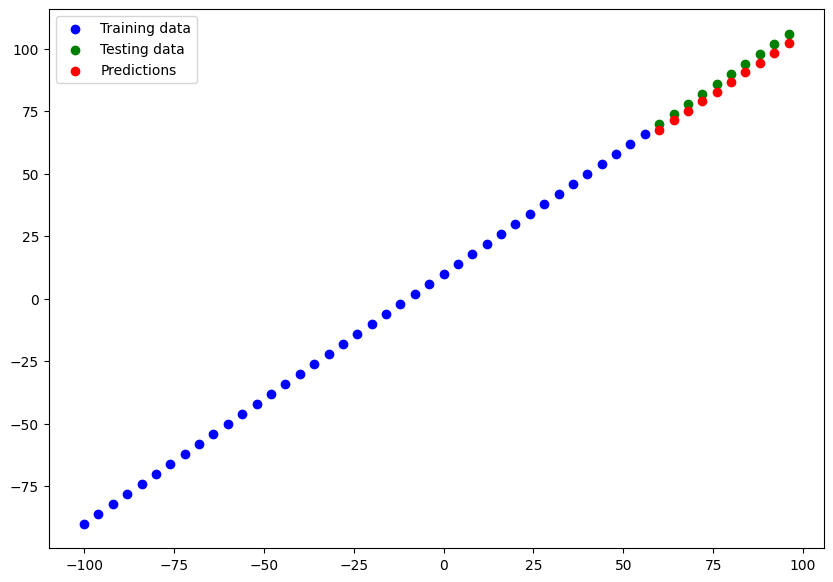

In [40]:
#prediction for model1
preds_1 = model.predict(X_test)
plot_predictions(predictions=preds_1)

In [41]:
#Calculate model metrics
mae_1 = mae(y_test, preds_1.squeeze()).numpy()
mse_1 = mse(y_test, preds_1.squeeze()).numpy()
mae_1, mse_1

(np.float32(3.1627717), np.float32(10.180852))

In [42]:
#Build model 2

#set random seed
tf.random.set_seed(42)

#Replicate model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])  

#compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit model
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


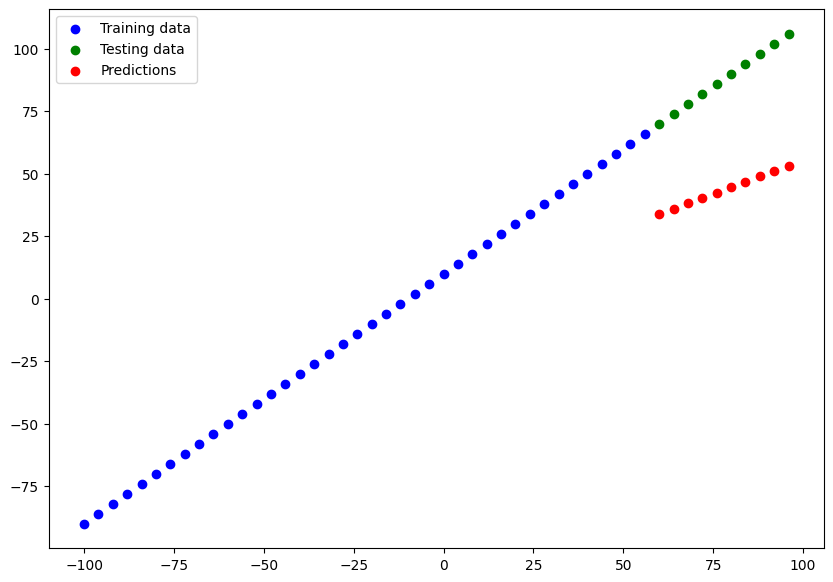

In [43]:
preds_2 = model_2.predict(X_test)
plot_predictions(predictions=preds_2)

In [44]:
mse_2=mse(y_test, preds_2).numpy()
mae_2=mae(y_test, preds_2).numpy()
mse_2, mae_2

(np.float32(2002.3822), np.float32(44.43289))

In [45]:
#Build model 3

#set random seed
tf.random.set_seed(42)

#Replicate model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit model
model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


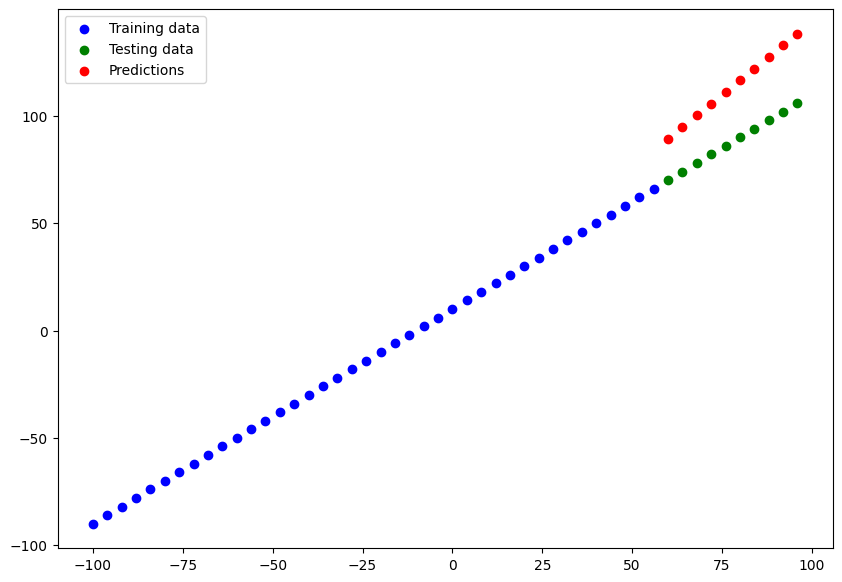

In [46]:
preds_3 = model_3.predict(X_test)
plot_predictions(predictions=preds_3)

In [47]:
mae_3 = mae(y_test, preds_3).numpy()
mse_3 = mse(y_test, preds_3).numpy()
mae_3, mse_3

(np.float32(25.758642), np.float32(680.5076))

Comparing results

In [48]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
import pandas as pd 
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,3.162772,10.180852
1,model_2,44.432892,2002.382202
2,model_3,25.758642,680.507629


In [49]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

SAVE MODEL

In [50]:
#Save the best performing model
model_3.save('saved_model/best_model.keras')

Loading model

In [51]:
#Load a model from file
loaded_saved_model = tf.keras.models.load_model("best_model.h5")
loaded_saved_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [52]:
#compare model 3 predictions with saved model predictions
preds_3 = model_3.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds).numpy() == mae(y_test, preds_3).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


np.False_

Larger Example

In [53]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [57]:
#Create X,y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) #reporoducibility
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [59]:
#set random seed
tf.random.set_seed(42)

#Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])    

#fit model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10300.3809 - mae: 10300.3809  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7642.4653 - mae: 7642.4653 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7315.9771 - mae: 7315.9771 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7477.5303 - mae: 7477.5303 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7732.6338 - mae: 7732.6338 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7287.4800 - mae: 7287.4800 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7931.7417 - mae: 7931.7417 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7802.0674 - mae: 7802.0674 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7705.1626 - mae: 7705.1626 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7586.7534 - mae: 7586.7534 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7258.7207 - mae: 7258.7207 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━

In [60]:
#chceck the results
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6335.3013 - mae: 6335.3013 


[6199.89013671875, 6199.89013671875]

Lets try a bigger model

In [61]:
#set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Create model with extra layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=["mae"])

#fit model
history = insurance_model_2.fit(X_train, y_train, epochs=2000, callbacks=[callback], verbose=0)
# history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)


In [62]:
#evaluate model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3218.4768 - mae: 3218.4768 


[3170.523681640625, 3170.523681640625]

Text(0.5, 0, 'epochs')

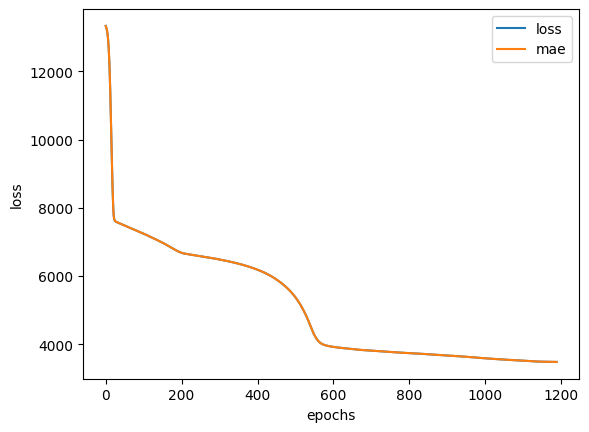

In [63]:
#Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#comparing 1st laer neurons

#set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Create model with extra layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=["mae"])

#fit model
history2 = insurance_model_2.fit(X_train, y_train, epochs=100, callbacks=[callback], verbose=0)

#Create model with extra layer
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=["mae"])

#fit model
history3 = insurance_model_2.fit(X_train, y_train, epochs=100, callbacks=[callback], verbose=0)


In [69]:
mae_2 = mae(y_test, insurance_model_2.predict(X_test)).numpy()
mse_2 = mse(y_test, insurance_model_2.predict(X_test)).numpy()
mse_3 = mse(y_test, insurance_model_3.predict(X_test)).numpy()  
mae_3 = mae(y_test, insurance_model_3.predict(X_test)).numpy()

model_results = [["10 neurons", mae_2, mse_2],
                 ["100 neurons", mae_3, mse_3]]
import pandas as pd 
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,model,mae,mse
0,10 neurons,3334.079102,36364652.0
1,100 neurons,12977.938477,323694080.0


Preprocessing Data